In [1]:
import os
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook', font_scale=1.5, rc={'lines.markeredgewidth': 2})
sns.set_style('white', {'axes.spines.right': False, 'axes.spines.top': False, 'xtick.bottom': True, 'ytick.left': True,})
sns.set_palette('deep')

%matplotlib inline

/Users/Farzaneh/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


ImportError: No module named seaborn

In [8]:
import visual_behavior.visualization.ophys.population_summary_figures as psf
import visual_behavior.visualization.ophys.experiment_summary_figures as esf
import visual_behavior.visualization.ophys.summary_figures as sf

import visual_behavior.ophys.response_analysis.utilities as ut

In [9]:
cache_dir = r'\\allen\programs\braintv\workgroups\nc-ophys\visual_behavior\visual_behavior_production_analysis'

In [10]:
save_figures = True
use_events = False

In [11]:
save_dir = os.path.join(cache_dir,'multi_session_summary_figures','dFF')

folder = 'response_metrics'

## Load mean response dataframes

#### Trial level data - trial averaged response around time of stimulus change for each image

In [12]:
summary_df_name = 'mean_trials_change_image_name_trial_type_df.h5'
# summary_df_name = 'mean_trials_change_image_name_trial_type_engaged_df.h5'
    
file_path = os.path.join(cache_dir,'multi_session_summary_dfs',summary_df_name)
trial_data = pd.read_hdf(file_path)

# need to fix this 
trial_data['area'] = trial_data.targeted_structure.values
trial_data['session_name'] = trial_data.session_type.values


trial_data = trial_data[(trial_data.trial_type=='go')]

#### engagement filter ####
# trial_data = trial_data[trial_data.engaged==True]

In [13]:
trial_data.cre_line.unique()

array(['Slc17a7-IRES2-Cre', 'Vip-IRES-Cre', 'Sst-IRES-Cre'], dtype=object)

#### Stimulus flash level data - average across all presentations of each image

In [14]:
summary_df_name = 'mean_flashes_image_name_engaged_df.h5'

file_path = os.path.join(cache_dir,'multi_session_summary_dfs',summary_df_name)
all_flash_data = pd.read_hdf(file_path, key='df', format='fixed')

all_flash_data['area'] = all_flash_data.targeted_structure.values
all_flash_data['session_name'] = all_flash_data.session_type.values

#### engagement filter ####
# all_flash_data = all_flash_data[all_flash_data.engaged==True]

In [15]:
all_flash_data.cre_line.unique()

array(['Slc17a7-IRES2-Cre', 'Vip-IRES-Cre', 'Sst-IRES-Cre'], dtype=object)

#### Stimulus flash level data by stimulus repetition - average across all presentations of each image, for 1st, 5th, 10th and 15th repetitions after a change

In [16]:
summary_df_name = 'mean_flashes_image_name_engaged_repeat_df.h5'


file_path = os.path.join(cache_dir,'multi_session_summary_dfs',summary_df_name)
flash_data = pd.read_hdf(file_path, key='df', format='fixed')

flash_data['area'] = flash_data.targeted_structure.values
flash_data['session_name'] = flash_data.session_type.values

flash_data = flash_data[flash_data.repeat==1] #change flash only

#### engagement filter ####
# flash_data = flash_data[flash_data.engaged==True]

In [17]:
flash_data.cre_line.unique()

array(['Slc17a7-IRES2-Cre', 'Vip-IRES-Cre', 'Sst-IRES-Cre'], dtype=object)

#### Omitted flash data - average response when a stimulus is omitted from a sequence for each image

In [18]:
summary_df_name = 'mean_omitted_flashes_image_name_df.h5'
#     summary_df_name = 'mean_omitted_flashes_image_name_engaged_df.h5'

file_path = os.path.join(cache_dir,'multi_session_summary_dfs',summary_df_name)
omitted_data = pd.read_hdf(file_path)

omitted_data['area'] = omitted_data.targeted_structure.values
omitted_data['session_name'] = omitted_data.session_type.values

#### engagement filter ####
# omitted_data = omitted_data[omitted_data.engaged==True]

#### abbreviate names

In [19]:
tdf = trial_data.copy()
fdf = flash_data.copy()
odf = omitted_data.copy()
idf = all_flash_data.copy()

# fdf = flash_data.copy()
# fdf = fdf[fdf.engaged==True]

In [20]:
fdf['omitted']= [True if image_name == 'omitted' else False for image_name in fdf.image_name.values]

In [21]:
idf['omitted']= [True if image_name == 'omitted' else False for image_name in idf.image_name.values]

In [22]:
fdf = fdf[fdf.repeat==1]
tdf = tdf[tdf.trial_type=='go']

### parse session names

#### NOTE: Rylan implemented a fix for this, use his method instead

In [23]:
a_values = ['_A','1','2','3','0','ImagesA','imagesA','habA','hab']
b_values = ['ImagesB','imagesB','4','5','6','_B']

image_set = []
for session_name in fdf.session_name.values: 
    if any(val in session_name for val in a_values): 
        image_set.append('A')
    elif any(val in session_name for val in b_values): 
        image_set.append('B')
    else: 
        image_set.append(None)
fdf['image_set'] = image_set    

In [24]:
fdf[fdf.image_set.isnull()].session_name.unique()

array(['behavior_session_passive', 'behavior_session_Hab',
       'behavior_session_Passive'], dtype=object)

In [25]:
active_values = ['0', '1', '3', '4', '6', 'Hab']
passive_values = ['2', '5', 'passive', 'Passive']

session_type = []
for session_name in fdf.session_name.values: 
    if any(val in session_name for val in active_values): 
        session_type.append('active')
    elif any(val in session_name for val in passive_values): 
        session_type.append('passive')
    else: 
        session_type.append(None)
fdf['session_type'] = session_type    

In [26]:
fdf[fdf.session_type.isnull()].session_name.unique()

array(['behavior_session_A', 'behavior_session_B',
       'behavior_session_imagesB'], dtype=object)

In [27]:
def parse_session_type(df): 
    a_values = ['_A','1','2','3','0','ImagesA','imagesA','habA','hab']
    b_values = ['ImagesB','imagesB','4','5','6','_B']

    image_set = []
    for session_name in df.session_name.values: 
        if any(val in session_name for val in a_values): 
            image_set.append('A')
        elif any(val in session_name for val in b_values): 
            image_set.append('B')
        else: 
            image_set.append(None)
    df['image_set'] = image_set   

    active_values = ['0', '1', '3', '4', '6', 'Hab']
    passive_values = ['2', '5', 'passive', 'Passive']

    session_type = []
    for session_name in df.session_name.values: 
        if any(val in session_name for val in active_values): 
            session_type.append('active')
        elif any(val in session_name for val in passive_values): 
            session_type.append('passive')
        else: 
            session_type.append(None)
    df['session_type'] = session_type    
    
    return df

In [28]:
fdf = parse_session_type(fdf)

In [29]:
idf = parse_session_type(idf)

In [30]:
odf = parse_session_type(odf)

In [31]:
tdf = parse_session_type(tdf)

### dataset contents

In [32]:
df = fdf.copy()
datacube_list = []
for cre_line in df.cre_line.unique():
    for image_set in np.sort(df.image_set.unique()):
        for session_type in df.session_type.unique():
            tmp = df[(df.cre_line==cre_line)&(df.image_set==image_set)&(df.session_type==session_type)]
            if len(tmp) > 0:
                n_sessions = len(tmp.experiment_id.unique())
                n_mice = len(tmp.specimen_id.unique())
                n_cells = len(tmp.cell_specimen_id.unique())
                datacube_list.append([cre_line,image_set,session_type,n_sessions, n_mice,n_cells])
columns = ['cre_line','image_set','session_type','n_sessions','n_mice','n_cells']
datacube = pd.DataFrame(datacube_list,columns=columns)
datacube

,cre_line,image_set,session_type,n_sessions,n_mice,n_cells
0,Slc17a7-IRES2-Cre,A,active,24,11,4829
1,Slc17a7-IRES2-Cre,A,passive,7,7,1241
2,Slc17a7-IRES2-Cre,B,active,21,12,4125
3,Slc17a7-IRES2-Cre,B,passive,8,8,1552
4,Vip-IRES-Cre,A,active,5,3,284
5,Vip-IRES-Cre,A,passive,2,2,91
6,Vip-IRES-Cre,B,active,6,3,205
7,Vip-IRES-Cre,B,passive,3,3,166
8,Sst-IRES-Cre,A,active,5,3,50
9,Sst-IRES-Cre,A,passive,1,1,21


In [33]:
container_list = []
for mouse in df.specimen_id.unique():
    tmp = df[df.specimen_id==mouse]
    experiment_ids = tmp.experiment_id.unique()
    print 'mouse', mouse, tmp.cre_line.values[0], len(experiment_ids), 'sessions'
    if len(experiment_ids) >=6: 
        complete = True
    else: 
        complete = False
    container_list.append([mouse, tmp.cre_line.values[0], len(experiment_ids), complete])
    for experiment_id in experiment_ids: 
        expt = tmp[tmp.experiment_id==experiment_id]
        print experiment_id, expt.image_set.values[0], expt.session_type.values[0]

mouse 722884882 Slc17a7-IRES2-Cre 6 sessions
775614751 A active
778644591 A passive
787461073 A active
788490510 B active
792812544 B active
796106850 B passive
mouse 756577249 Slc17a7-IRES2-Cre 7 sessions
782675436 A active
783927872 A active
784482326 A passive
788489531 B passive
789359614 B active
795948257 A active
799368904 B active
mouse 744935649 Slc17a7-IRES2-Cre 6 sessions
783928214 B passive
787498309 A active
787501821 B active
790709081 A active
791119849 None passive
792816531 A active
mouse 741953995 Slc17a7-IRES2-Cre 3 sessions
788488596 A active
790149413 None passive
791453282 B active
mouse 744911458 Vip-IRES-Cre 7 sessions
791980891 None active
792815735 A active
795073741 A active
795953296 B active
796108483 B passive
796308505 B active
798404219 None passive
mouse 756674785 Slc17a7-IRES2-Cre 6 sessions
792813858 A active
794381992 A active
795076128 B active
795952471 B passive
796105304 B active
797255551 None passive
mouse 738695289 Sst-IRES-Cre 5 sessions
7943

In [34]:
container_df = pd.DataFrame(container_list, columns=['mouse_id', 'cre_line', 'n_sessions', 'complete'])
container_df

,mouse_id,cre_line,n_sessions,complete
0,722884882,Slc17a7-IRES2-Cre,6,True
1,756577249,Slc17a7-IRES2-Cre,7,True
2,744935649,Slc17a7-IRES2-Cre,6,True
3,741953995,Slc17a7-IRES2-Cre,3,False
4,744911458,Vip-IRES-Cre,7,True
5,756674785,Slc17a7-IRES2-Cre,6,True
6,738695289,Sst-IRES-Cre,5,False
7,756575011,Sst-IRES-Cre,2,False
8,765992005,Sst-IRES-Cre,5,False
9,760949544,Vip-IRES-Cre,5,False


## Compute response metrics

### set responsiveness criteria

#### NOTE: need to replace this definition with the one comparing to spontaneous activity rather than omitted periods

In [35]:
def filter_by_responsiveness(data, use_events=False):
#     df = data[data.pref_stim==True].copy()
    df = data.copy()
    if use_events: 
        filtered_df = df[(df.fraction_nonzero_trials>0.25)]
    else:
        #significant trial means the trial response is sig. diff. from a shuffled distribution from omitted flashes
        filtered_df = df[(df.fraction_significant_trials>0.25)] 
    return filtered_df

### get cell summary dfs

In [36]:
# to consider the preferred stimulus only for the first flash after a change, re-annotate
# otherwise will consider 5th, 10th, and 15th flashes when determining preferred stimulus
# fdf = ut.annotate_mean_df_with_pref_stim(fdf)

In [37]:
len(fdf.cell_specimen_id.unique())

14350

In [38]:
# start with flashes 
cell_summary_df = fdf[(fdf.pref_stim==True)].copy()
cell_summary_df = cell_summary_df.rename(columns={'image_name':'pref_image_name'})
# cell_summary_df = cell_summary_df.reset_index().drop(columns=['level_0','index','mean_responses'])

In [39]:
# with repeats
def get_session_summary_df(fdf, use_events=False):
    # only consider responses to preferred stimulus
    df = fdf[fdf.pref_stim==True].copy() 
    summary_data = []
    for experiment_id in df.experiment_id.unique():
        for repeat in df.repeat.unique():
            expt = df[(df.experiment_id == experiment_id)&(df.repeat==repeat)&(df.engaged==True)]
            repeat = repeat
            area = expt.targeted_structure.unique()[0]
            cre_line = expt.cre_line.unique()[0]
            mouse_id = expt.donor_id.unique()[0]
            depth = expt.imaging_depth.unique()[0]
            session_type = expt.session_type.unique()[0]
            image_set = expt.image_set.unique()[0]
            experiment_date = expt.experiment_date.unique()[0]
            n_cells = len(expt.cell_specimen_id.unique())
            summary_data.append(
                [experiment_id, repeat, mouse_id, session_type, image_set, area, cre_line, experiment_date, depth, n_cells])

    columns = ['experiment_id', 'repeat',' mouse_id', 'session_type','image_set', 'area', 'cre_line', 
               'experiment_date', 'depth', 'n_cells']
    session_summary_df = pd.DataFrame(data=summary_data, columns=columns)
    return session_summary_df

def add_metric_to_session_summary_df(metric, data, session_summary_df, responsive_only=False, use_events=False):
    if responsive_only: 
        df = filter_by_responsiveness(data, use_events=use_events)
    else: 
        df = data.copy()
    session_summary_df[metric] = None
    for experiment_id in session_summary_df.experiment_id.unique(): 
        for repeat in session_summary_df.repeat.unique():
            metric_values = df[(df.experiment_id==experiment_id)&(df.repeat==repeat)][metric].values
            session_mean = np.nanmean(metric_values)
            idx = session_summary_df[(session_summary_df.experiment_id==experiment_id)&
                                     (session_summary_df.repeat==repeat)].index[0]
            session_summary_df.loc[idx, metric] = session_mean
    return session_summary_df

In [40]:
session_summary_df = get_session_summary_df(fdf)
session_summary_df.head()

,experiment_id,repeat,mouse_id,session_type,image_set,area,cre_line,experiment_date,depth,n_cells
0,775614751,1,403491,active,A,VISp,Slc17a7-IRES2-Cre,2018-11-08,375,47
1,778644591,1,403491,passive,A,VISp,Slc17a7-IRES2-Cre,2018-11-13,375,136
2,782675436,1,416369,active,A,VISp,Slc17a7-IRES2-Cre,2018-11-16,375,122
3,783927872,1,416369,active,A,VISp,Slc17a7-IRES2-Cre,2018-11-20,375,194
4,783928214,1,412364,passive,B,VISp,Slc17a7-IRES2-Cre,2018-11-20,375,230


In [41]:
session_summary_df['cre line'] = [cre_line.split('-')[0] for cre_line in session_summary_df.cre_line.values]

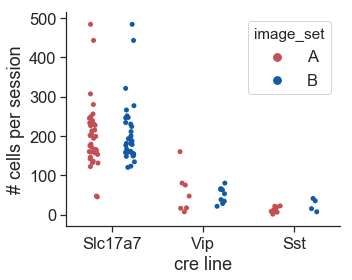

In [42]:
df = session_summary_df[session_summary_df.repeat==1].copy()
figsize = (5,4)
fig, ax = plt.subplots(figsize=figsize)
ax = sns.stripplot(data=df, x='cre line', y='n_cells', hue='image_set', palette=ut.get_colors_for_image_sets(), 
              ax = ax, dodge=True)
ax.set_ylabel('# cells per session')
fig.tight_layout()
sf.save_figure(fig, figsize, save_dir, 'session_numbers', 'n_cells_by_image_set')

## Compute metrics

### Response latency

#### use time to peak from all flashes df

In [43]:
# time_to_peak = []
# for row in np.arange(0,len(cell_summary_df),1): 
#     row_data = cell_summary_df.iloc[row]
#     if row_data['repeat'] == 1: 
#         cell_specimen_id = row_data.cell_specimen_id
#         pref_stim = row_data.pref_image_name
#         i = idf[(idf.cell_specimen_id==cell_specimen_id)&(idf.image_name==pref_stim)]
#         time_to_peak.append(i.time_to_peak.values[0])
#     else: 
#         time_to_peak.append(np.nan)
# cell_summary_df['time_to_peak'] = time_to_peak  

In [44]:
# session_summary_df = add_metric_to_session_summary_df('time_to_peak', cell_summary_df, session_summary_df, use_events=use_events, responsive_only=False)

### Response magnitude

In [45]:
session_summary_df = add_metric_to_session_summary_df('mean_response', cell_summary_df, session_summary_df, use_events=use_events, responsive_only=False)

### Response reliability

#### reliabiliy = average trial to trial correlation of the dF/F trace +/-0.5 sec around change time for a given change image, measure of similarity in response profile

pre-change image may influence this metric, could restrict correlation to post-change response only using flash response df

In [46]:
if 'reliability' in cell_summary_df.keys():
    session_summary_df = add_metric_to_session_summary_df('reliability', cell_summary_df, session_summary_df, use_events=use_events, responsive_only=False)

#### fraction active trials = fraction of trials for the preferred stimulus with a stimulus evoked response magnitude > 0.05 dF/F

In [47]:
session_summary_df = add_metric_to_session_summary_df('fraction_active_trials', cell_summary_df, session_summary_df, use_events=use_events, responsive_only=False)

#### fraction significant trials = fraction of flashes with a p_value <0.05, comparing mean stimulus evoked response to a shuffled distribution from omitted flashes (gray screen) 

In [48]:
session_summary_df = add_metric_to_session_summary_df('fraction_significant_trials', cell_summary_df, session_summary_df, use_events=use_events, responsive_only=False)

#### stimulus modulation

In [49]:
def compute_f1(inp, freq = 1/0.75):
    ps = np.fft.fft(inp)**2 / np.sqrt(len(inp))
    return np.abs(ps[int(freq)])

In [50]:
trial_window = [-4, 8]
response_window_duration = 0.5  
response_window = [np.abs(trial_window[0]), np.abs(trial_window[0]) + response_window_duration]
baseline_window = [0, np.abs(trial_window[0])]
response_frames = [int(frame) for frame in np.asarray(response_window)*31.]
baseline_frames = [int(frame) for frame in np.asarray(baseline_window)*31.]

In [51]:
f1_values = []
f0_values = []
f1_f0 = []
for row in range(len(tdf)):
    trace = tdf.iloc[row].mean_trace
    response = np.mean(trace[response_frames[0]:response_frames[1]])
    baseline = np.mean(trace[baseline_frames[0]:baseline_frames[1]])

    input_trace = trace[response_frames[0]:response_frames[1]]
    f1 = compute_f1(input_trace, freq = 1/0.75)
    f0 = np.mean(input_trace)
    f1_values.append(f1)
    f0_values.append(f0)
    f1_f0.append(f1/f0)

tdf['F1'] = f1_values
tdf['F0'] = f0_values
tdf['F1_F0'] = f1_f0

In [52]:
f1_values = []
f0_values = []
f1_f0 = []
for row in np.arange(0,len(cell_summary_df),1): 
    row_data = cell_summary_df.iloc[row]
    if row_data['repeat'] == 1: 
        pref_stim = row_data.pref_image_name
        cell_specimen_id = row_data.cell_specimen_id
        t = tdf[(tdf.cell_specimen_id==cell_specimen_id)&(tdf.change_image_name==pref_stim)]
        f1_values.append(t.F1.values[0])
        f0_values.append(t.F0.values[0])
        f1_f0.append(t.F1_F0.values[0])
    else: 
        f1_values.append(np.nan)
        f0_values.append(np.nan)
        f1_f0.append(np.nan)
cell_summary_df['F1'] = f1_values
cell_summary_df['F0'] = f0_values
cell_summary_df['F1_F0'] = f1_f0    

In [53]:
session_summary_df = add_metric_to_session_summary_df('F1_F0', cell_summary_df, session_summary_df, use_events=use_events, responsive_only=False)

In [54]:
df = cell_summary_df.copy()
metrics = ['mean_response','F1_F0','fraction_significant_trials']
for metric in metrics: 
    fraction_responsive_list = []
    for experiment_id in session_summary_df.experiment_id.unique():
        for repeat in session_summary_df.repeat.unique(): 
            if repeat == 1: 
                expt = df[(df.experiment_id == experiment_id)&(df.repeat==repeat)]
                n_cells = len(expt.cell_specimen_id.unique())
                if metric is 'mean_response': 
                    n_responsive = len(expt[expt.mean_response>0.05].cell_specimen_id.unique())
                if metric is 'F1_F0':
                    n_responsive = len(expt[expt.F1_F0>1].cell_specimen_id.unique())
                if metric is 'fraction_significant_trials':
                    if np.isnan(expt.fraction_significant_trials.values[0])==False: #if has omitted
                        n_responsive = len(expt[expt.fraction_significant_trials>0.25].cell_specimen_id.unique())
                    else: 
                        n_responsive = np.nan
                fraction = n_responsive / float(n_cells)
                fraction_responsive_list.append(fraction)
            else: 
                expt = df[(df.experiment_id == experiment_id)&(df.repeat==repeat)]
                n_cells = len(expt.cell_specimen_id.unique())
                if metric is 'mean_response': 
                    n_responsive = len(expt[expt.mean_response>0.05].cell_specimen_id.unique())
                    fraction = n_responsive / float(n_cells)
                    fraction_responsive_list.append(fraction)
                elif metric is 'fraction_significant_trials':
                    if np.isnan(expt.fraction_significant_trials.values[0])==False: #if has omitted
                        n_responsive = len(expt[expt.fraction_significant_trials>0.25].cell_specimen_id.unique())
                    else: 
                        n_responsive = np.nan
                    fraction = n_responsive / float(n_cells)
                    fraction_responsive_list.append(fraction)
                else: 
                    fraction_responsive_list.append(np.nan)
    session_summary_df['fraction_responsive_'+metric] = fraction_responsive_list

In [55]:
session_summary_df['fraction_stimulus_modulated'] = session_summary_df.fraction_responsive_F1_F0.values

In [56]:
session_summary_df['fraction_active'] = session_summary_df.fraction_responsive_mean_response.values

In [57]:
session_summary_df['fraction_responsive'] = session_summary_df.fraction_responsive_fraction_significant_trials.values

### plot summary data

In [58]:
def adjust_box_widths(ax, fac):
    from matplotlib.patches import PathPatch
    # Adjust the withs of a seaborn-generated boxplot.
    for c in ax.get_children():
        if isinstance(c, PathPatch):
            p = c.get_path()
            verts = p.vertices
            verts_sub = verts[:-1]
            xmin = np.min(verts_sub[:,0])
            xmax = np.max(verts_sub[:,0])
            xmid = 0.5*(xmin+xmax)
            xhalf = 0.5*(xmax - xmin)
            xmin_new = xmid-fac*xhalf
            xmax_new = xmid+fac*xhalf
            verts_sub[verts_sub[:,0] == xmin,0] = xmin_new
            verts_sub[verts_sub[:,0] == xmax,0] = xmax_new
            for l in ax.lines:
                if np.all(l.get_xdata() == [xmin,xmax]):
                    l.set_xdata([xmin_new,xmax_new])

In [59]:
def plot_boxplot_and_swarm_for_condition(df, metric, condition='cre_line', condition_values=ut.get_cre_lines, 
                                         colors=sns.color_palette(), hue='image_set', ylabel=None, plot_swarm=True,
                            range=(0,1), ax=None, save_figures=False, save_dir=None, folder=None, legend=False):
    df[metric] = pd.to_numeric(df[metric])
    if ax is None: 
        figsize = (4.5,4.5)
        fig,ax = plt.subplots(figsize=figsize)
    hue_order = np.sort(df[hue].unique())
    ax = sns.boxplot(data=df, x=condition, y=metric, hue_order=hue_order,
                 hue=hue, ax=ax, dodge=True, palette=colors) #color='white',
    adjust_box_widths(ax, 0.8)
    if plot_swarm: 
        ax = sns.swarmplot(data=df, x=condition, y=metric,
                      size=3, ax=ax, hue=hue, hue_order=hue_order, color='.3', dodge=True) #palette=colors, 

        swarm_cols = ax.collections
        for swarm in swarm_cols: 
            swarm.set_facecolors([0.6,0.6,0.6])

    if ylabel is None:
        ax.set_ylabel('fraction of cells per session')
    else: 
        ax.set_ylabel(ylabel)
    ax.set_ylim(range[0]-0.05,range[1]+.05)
    ax.get_legend().remove()
    ax.set_title(metric)
    sns.despine(offset=10, trim=True)
    if legend: 
        l = ax.legend(title=condition, fontsize='small', bbox_to_anchor=(1,1))
        plt.setp(l.get_title(),fontsize='small')
    if save_figures: 
        #         fig.tight_layout()
        
        plt.gcf().subplots_adjust(top=0.85)
        plt.gcf().subplots_adjust(left=0.25)
        plt.gcf().subplots_adjust(right=0.85)
        plt.gcf().subplots_adjust(bottom=0.25)
        psf.save_figure(fig ,figsize, save_dir, folder, metric+'_by_'+condition+'_box_swarm')

    return ax

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:18: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


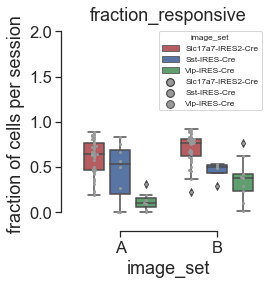

In [60]:
condition = 'image_set'
condition_values = ut.get_image_sets(fdf)
hue = 'cre_line'

colors = sns.color_palette()
colors = [colors[3],colors[0],colors[2],colors[4]]

metric = 'fraction_responsive'
df = session_summary_df.copy()
df = df[df.repeat==1]

plot_boxplot_and_swarm_for_condition(df, metric, condition, condition_values, colors, hue, legend=True,
                        range=(-0.05,2), ax=None, save_figures=save_figures, save_dir=save_dir, folder=folder)


C:\Anaconda\lib\site-packages\ipykernel\__main__.py:18: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


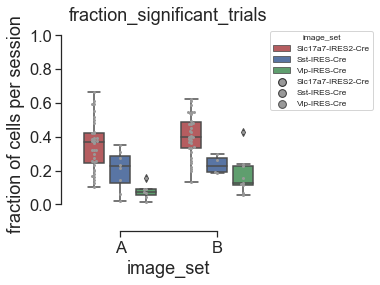

In [61]:
condition = 'image_set'
condition_values = ut.get_image_sets(fdf)
hue = 'cre_line'
# hue = 'active' # use passive active flag for colors instead of cre line for colors 

colors = sns.color_palette()
colors = [colors[3],colors[0],colors[2],colors[4]]

metric = 'fraction_significant_trials'
df = session_summary_df.copy()
df = df[df.repeat==1]
# df = df[df.cre_line=='Vip-IRES-Cre'] #only make plot for one cre line

plot_boxplot_and_swarm_for_condition(df, metric, condition, condition_values, colors, hue, legend=True,
                        range=(-0.05,1), ax=None, save_figures=save_figures, save_dir=save_dir, folder=folder)


C:\Anaconda\lib\site-packages\ipykernel\__main__.py:18: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


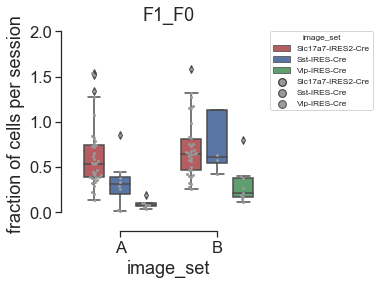

In [62]:
condition = 'image_set'
condition_values = ut.get_image_sets(fdf)
hue = 'cre_line'

colors = sns.color_palette()
colors = [colors[3],colors[0],colors[2],colors[4]]

metric = 'F1_F0'
df = session_summary_df.copy()
df = df[df.repeat==1]

plot_boxplot_and_swarm_for_condition(df, metric, condition, condition_values, colors, hue, legend=True,
                        range=(-0.05,2), ax=None, save_figures=save_figures, save_dir=save_dir, folder=folder)


C:\Anaconda\lib\site-packages\ipykernel\__main__.py:18: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


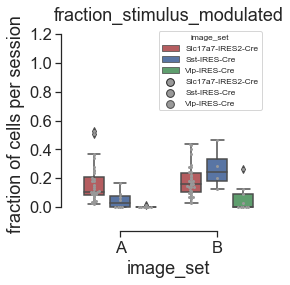

In [63]:
condition = 'image_set'
condition_values = ut.get_image_sets(fdf)
hue = 'cre_line'

colors = sns.color_palette()
colors = [colors[3],colors[0],colors[2],colors[4]]

metric = 'fraction_stimulus_modulated'
df = session_summary_df.copy()
df = df[df.repeat==1]

plot_boxplot_and_swarm_for_condition(df, metric, condition, condition_values, colors, hue, legend=True,
                        range=(-0.05,1.2), ax=None, save_figures=save_figures, save_dir=save_dir, folder=folder)


### population averages

In [64]:
def plot_response_across_conditions_population(df, condition='repeat', conditions=[1,10], 
                                    window=[-0.5, 0.75], save_figures=False, colors=None, autoscale=False,
                                    save_dir=None, folder=None, ax=None, pref_stim=True, omitted=False):
    image_set = df.image_set.unique()[0]
    cre_line = df.cre_line.unique()[0]
    if pref_stim: 
        df = df[df.pref_stim==True].copy()
    if ax is None:
        figsize = (5,5)
        fig, ax = plt.subplots(figsize=figsize)
    if np.abs(window[0])>=1: 
        interval_sec = 1
    else: 
        interval_sec = 0.5
    for c, condition_value in enumerate(conditions[::-1]):
        tmp = df[df[condition]==condition_value]
        if colors is None: 
            image_lookup = get_image_color_lookup(mdf)
            image_names = df[df.image_set==image_set].image_name.unique()
            colors = get_colors_for_image_names(image_names, image_lookup)
        traces = tmp.mean_trace.values
        trace = np.mean(traces)
        ax = sf.plot_mean_trace(traces, 31., legend_label=condition_value, color=colors[c], interval_sec=interval_sec, 
                                xlims=window, ax=ax)
        
    
    ax = psf.plot_flashes_on_trace(ax, flashes=True, alpha=0.15, window=window, omitted=omitted)
    xticks, xticklabels = sf.get_xticks_xticklabels(trace, 31., interval_sec=interval_sec, window=window)
    ax.set_xticks(xticks)
    if interval_sec >=1: 
        ax.set_xticklabels([int(x) for x in xticklabels])
    else: 
        ax.set_xticklabels(xticklabels)
    ax.set_xlim(0,(np.abs(window[0])+window[1])*31.)
    ax.legend(bbox_to_anchor=(1.1,1), title=condition)
    if not autoscale: 
        ymin, ymax = ax.get_ylim()
        if ymin>0:  
            ax.set_ylim(0, ymax*1.2)
        else: 
            ax.set_ylim(ymin*1.2, ymax*1.2)
    ax.set_title(image_set)
    if save_figures:
        fig.tight_layout()
        psf.save_figure(fig, figsize, save_dir, folder, str(int(cdf.experiment_id.unique()[0]))+'_'+str(int(cell_specimen_id)))
        plt.close()
    return ax

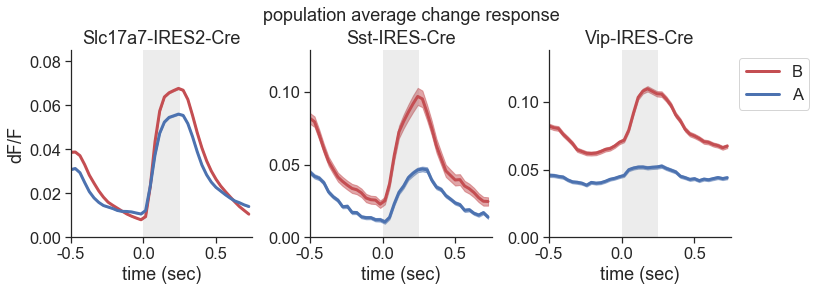

In [65]:
mdf = fdf.copy()
mdf = mdf[mdf.repeat==1]
condition = 'image_set'
conditions = ['A', 'B']
window =[ -0.5, 0.75]
colors = sns.color_palette()
colors = [colors[3],colors[0],colors[2],colors[4]]

cre_lines = ut.get_cre_lines(mdf)

figsize = (12,4)
fig, ax = plt.subplots(1,len(cre_lines), figsize=figsize, sharey=False)
ax = ax.ravel()

for i, cre_line in enumerate(ut.get_cre_lines(mdf)):
    df = mdf[(mdf.cre_line==cre_line)].copy()

    ax[i] = plot_response_across_conditions_population(df, condition=condition, conditions=conditions,
                                        window=[-0.5, 0.75], save_figures=False, colors=colors, autoscale=False,
                                        save_dir=None, folder=None, ax=ax[i], pref_stim=False)
    ax[i].get_legend().remove()
    ax[i].set_ylabel('')
    ax[i].set_title(cre_line)
ax[i].legend(bbox_to_anchor=(1,1))
ax[0].set_ylabel('dF/F')

plt.suptitle('population average change response', x=0.48, y=1, fontsize=18, horizontalalignment='center')

if save_figures:
    fig.tight_layout()
    plt.gcf().subplots_adjust(top=0.85)
    plt.gcf().subplots_adjust(right=0.85)

    psf.save_figure(fig, figsize, save_dir, folder, 'change_response_across_image_sets_all_stimuli')

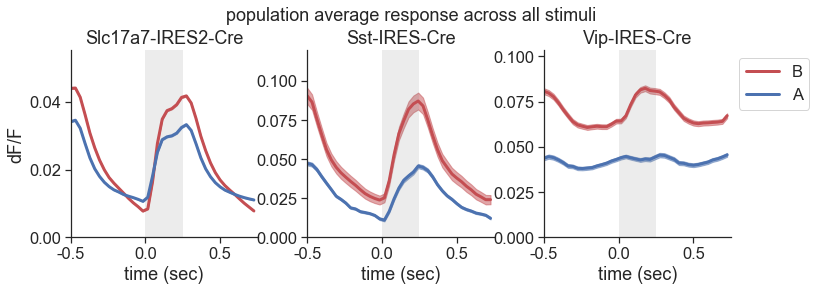

In [66]:
mdf = idf.copy()
condition = 'image_set'
conditions = ['A', 'B']
window =[ -0.5, 0.75]
colors = sns.color_palette()
colors = [colors[3],colors[0],colors[2],colors[4]]

cre_lines = ut.get_cre_lines(mdf)

figsize = (12,4)
fig, ax = plt.subplots(1,3, figsize=figsize, sharey=False)
ax = ax.ravel()

for i, cre_line in enumerate(ut.get_cre_lines(mdf)):
    df = mdf[(mdf.cre_line==cre_line)].copy()

    ax[i] = plot_response_across_conditions_population(df, condition=condition, conditions=conditions,
                                        window=[-0.5, 0.75], save_figures=False, colors=colors, autoscale=False,
                                        save_dir=None, folder=None, ax=ax[i], pref_stim=False)
    ax[i].get_legend().remove()
    ax[i].set_ylabel('')
    ax[i].set_title(cre_line)
ax[i].legend(bbox_to_anchor=(1,1))
ax[0].set_ylabel('dF/F')

plt.suptitle('population average response across all stimuli', x=0.48, y=1, fontsize=18, horizontalalignment='center')

if save_figures:
    fig.tight_layout()
    plt.gcf().subplots_adjust(top=0.85)
    plt.gcf().subplots_adjust(right=0.85)

    psf.save_figure(fig, figsize, save_dir, folder, 'change_response_across_image_sets_all_flashes_all_stim')

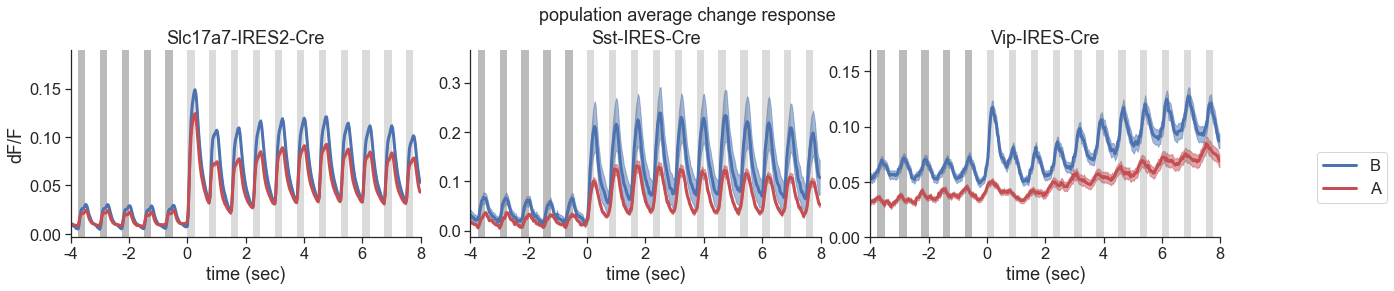

In [67]:
mdf = tdf.copy()
condition = 'image_set'
conditions = ['A', 'B']
window =[ -0.5, 0.75]
colors = sns.color_palette()
colors = [colors[3],colors[0]][::-1]

cre_lines = ut.get_cre_lines(mdf)

figsize = (20,4)
fig, ax = plt.subplots(1,len(cre_lines), figsize=figsize, sharey=False)
ax = ax.ravel()

for i, cre_line in enumerate(ut.get_cre_lines(mdf)):
    df = mdf[(mdf.cre_line==cre_line)].copy()

    ax[i] = plot_response_across_conditions_population(df, condition=condition, conditions=conditions,
                                        window=[-4, 8], save_figures=False, colors=colors, autoscale=False,
                                        save_dir=None, folder=None, ax=ax[i], pref_stim=True)
    ax[i] = psf.plot_flashes_on_trace(ax[i], flashes=False, trial_type='go', alpha=0.15, window=[-4,8])
    xticks, xticklabels = sf.get_xticks_xticklabels(df.mean_trace.mean(), 31., interval_sec=2, window=[-4,8])
    ax[i].set_xticks(xticks)
    ax[i].set_xticklabels([int(x) for x in xticklabels])
    ax[i].get_legend().remove()
    ax[i].set_ylabel('')
    ax[i].set_title(cre_line)

ax[i].legend(bbox_to_anchor=(1.5,.5))
ax[0].set_ylabel('dF/F')

plt.suptitle('population average change response', x=0.48, y=1, fontsize=18, horizontalalignment='center')

if save_figures:
    fig.tight_layout()
    plt.gcf().subplots_adjust(top=0.85)
    plt.gcf().subplots_adjust(right=0.85)

    psf.save_figure(fig, figsize, save_dir, folder, 'change_response_across_image_sets_trials_8s')

### omitted flashes 

In [68]:
def plot_response_across_conditions_population(df, condition='repeat', conditions=[1,10], 
                                    window=[-0.5, 0.75], save_figures=False, colors=None, autoscale=False,
                                    save_dir=None, folder=None, ax=None, pref_stim=True, omitted=False):
    image_set = df.image_set.unique()[0]
    cre_line = df.cre_line.unique()[0]
    if pref_stim: 
        df = df[df.pref_stim==True].copy()
    if ax is None:
        figsize = (5,5)
        fig, ax = plt.subplots(figsize=figsize)
    if np.abs(window[0])>=1: 
        interval_sec = 1
    else: 
        interval_sec = 0.5
    for c, condition_value in enumerate(conditions[::-1]):
        tmp = df[df[condition]==condition_value]
        if colors is None: 
            image_lookup = get_image_color_lookup(mdf)
            image_names = df[df.image_set==image_set].image_name.unique()
            colors = get_colors_for_image_names(image_names, image_lookup)
        traces = tmp.mean_trace.values
        trace = np.mean(traces)
        ax = sf.plot_mean_trace(traces, 31., legend_label=condition_value, color=colors[c], interval_sec=interval_sec, 
                                xlims=window, ax=ax)
        
    
    ax = psf.plot_flashes_on_trace(ax, flashes=True, alpha=0.15, window=window, omitted=omitted)
    xticks, xticklabels = sf.get_xticks_xticklabels(trace, 31., interval_sec=interval_sec, window=window)
    ax.set_xticks(xticks)
    if interval_sec >=1: 
        ax.set_xticklabels([int(x) for x in xticklabels])
    else: 
        ax.set_xticklabels(xticklabels)
    ax.set_xlim(0,(np.abs(window[0])+window[1])*31.)
    ax.legend(bbox_to_anchor=(1.1,1), title=condition)
    if not autoscale: 
        ymin, ymax = ax.get_ylim()
        if ymin>0:  
            ax.set_ylim(0, ymax*1.2)
        else: 
            ax.set_ylim(ymin*1.2, ymax*1.2)
    ax.set_title(image_set)
    if save_figures:
        fig.tight_layout()
        psf.save_figure(fig, figsize, save_dir, folder, str(int(cdf.experiment_id.unique()[0]))+'_'+str(int(cell_specimen_id)))
        plt.close()
    return ax

In [69]:
save_figures = True

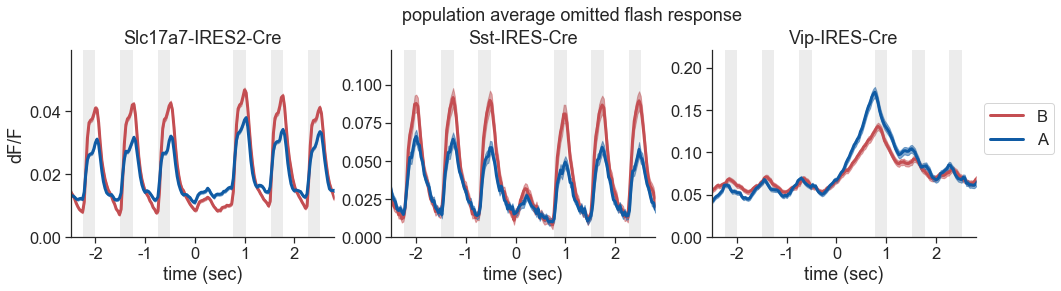

In [70]:
xlims = [-1,3]
condition = 'image_set'
conditions = ut.get_image_sets(odf)[1:]

colors = [sns.color_palette()[3]]+sns.color_palette('Blues_r',5)[:3]

cre_lines = ut.get_cre_lines(odf)

figsize = (16,4)
fig, ax = plt.subplots(1,len(cre_lines), figsize=figsize, sharey=False)
ax = ax.ravel()

for i, cre_line in enumerate(ut.get_cre_lines(odf)):
    df = odf[(odf.cre_line==cre_line)].copy()
    df = df[df.session_type=='passive']

    ax[i] = plot_response_across_conditions_population(df, condition=condition, conditions=conditions,
                                        window=[-3,3], save_figures=False, colors=colors, autoscale=False,
                                        save_dir=None, folder=None, ax=ax[i], pref_stim=False, omitted=True)
    ax[i].get_legend().remove()
    ax[i].set_ylabel('')
    ax[i].set_title(cre_line)
    ax[i].set_xlim(0.5*31.,5.8*31.)

ax[i].legend(bbox_to_anchor=(1,0.4))
ax[0].set_ylabel('dF/F')

plt.suptitle('population average omitted flash response', x=0.5, y=1, fontsize=18, horizontalalignment='center')

if save_figures:
    fig.tight_layout()
    plt.gcf().subplots_adjust(top=0.85)
    plt.gcf().subplots_adjust(right=0.85)

    psf.save_figure(fig, figsize, save_dir, folder, 'omitted_flash_across_image_sets')

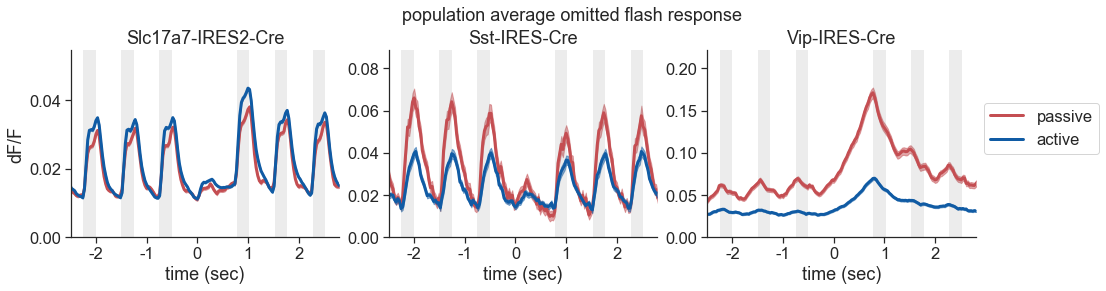

In [71]:
df = odf.copy()
df = df[df.image_set=='A']

xlims = [-1,3]
condition = 'session_type'
conditions = ['active','passive']

colors = [sns.color_palette()[3]]+sns.color_palette('Blues_r',5)[:3]

cre_lines = ut.get_cre_lines(df)

figsize = (16,4)
fig, ax = plt.subplots(1,len(cre_lines), figsize=figsize, sharey=False)
ax = ax.ravel()

for i, cre_line in enumerate(ut.get_cre_lines(df)):
    tmp = df[(df.cre_line==cre_line)].copy()

    ax[i] = plot_response_across_conditions_population(tmp, condition=condition, conditions=conditions,
                                        window=[-3,3], save_figures=False, colors=colors, autoscale=False,
                                        save_dir=None, folder=None, ax=ax[i], pref_stim=False, omitted=True)
    ax[i].get_legend().remove()
    ax[i].set_ylabel('')
    ax[i].set_title(cre_line)
    ax[i].set_xlim(0.5*31.,5.8*31.)

ax[i].legend(bbox_to_anchor=(1,0.4))
ax[0].set_ylabel('dF/F')

plt.suptitle('population average omitted flash response', x=0.5, y=1, fontsize=18, horizontalalignment='center')

if save_figures:
    fig.tight_layout()
    plt.gcf().subplots_adjust(top=0.85)
    plt.gcf().subplots_adjust(right=0.85)

    psf.save_figure(fig, figsize, save_dir, folder, 'omitted_flash_across_session_types_A')

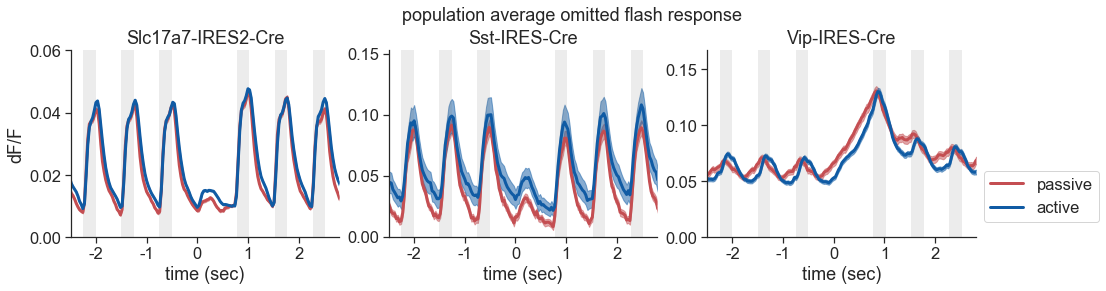

In [72]:
df = odf.copy()
df = df[df.image_set=='B']

xlims = [-1,3]
condition = 'session_type'
conditions = ['active','passive']

colors = [sns.color_palette()[3]]+sns.color_palette('Blues_r',5)[:3]

cre_lines = ut.get_cre_lines(df)

figsize = (16,4)
fig, ax = plt.subplots(1,len(cre_lines), figsize=figsize, sharey=False)
ax = ax.ravel()

for i, cre_line in enumerate(ut.get_cre_lines(df)):
    tmp = df[(df.cre_line==cre_line)].copy()

    ax[i] = plot_response_across_conditions_population(tmp, condition=condition, conditions=conditions,
                                        window=[-3,3], save_figures=False, colors=colors, autoscale=False,
                                        save_dir=None, folder=None, ax=ax[i], pref_stim=False, omitted=True)
    ax[i].get_legend().remove()
    ax[i].set_ylabel('')
    ax[i].set_title(cre_line)
    ax[i].set_xlim(0.5*31.,5.8*31.)

ax[i].legend(bbox_to_anchor=(1,0.4))
ax[0].set_ylabel('dF/F')

plt.suptitle('population average omitted flash response', x=0.5, y=1, fontsize=18, horizontalalignment='center')

if save_figures:
    fig.tight_layout()
    plt.gcf().subplots_adjust(top=0.85)
    plt.gcf().subplots_adjust(right=0.85)

    psf.save_figure(fig, figsize, save_dir, folder, 'omitted_flash_across_session_types_B')

### response heatmaps

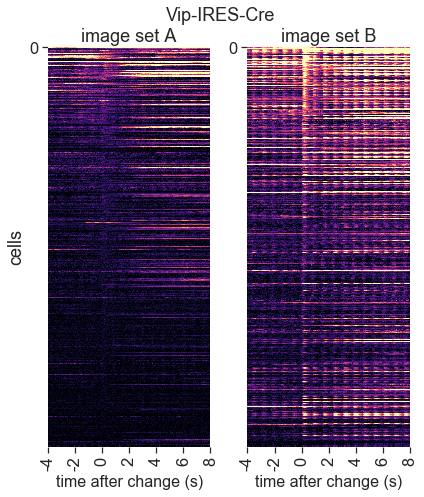

In [73]:
cre_line = 'Vip-IRES-Cre'

figsize=(6,7)
fig, ax = plt.subplots(1,2,figsize=figsize)
ax = ax.ravel()
for i,image_set in enumerate(['A','B']): 
    df = tdf[(tdf.cre_line==cre_line)&(tdf.image_set==image_set)]
    ax[i] = psf.plot_pref_stim_responses(df, vmax=0.3, ax=ax[i], window=[-4,8], colorbar=False, use_events=use_events, save_dir=None, folder='all_flashes')
    ax[i].set_title('image set '+image_set)
    ax[i].set_ylabel('')
ax[0].set_ylabel('cells')
fig.tight_layout()  

if save_dir:
    plt.suptitle(cre_line, x=0.52, y=0.98, fontsize=18, horizontalalignment='center')
    fig.tight_layout()
    plt.gcf().subplots_adjust(top=0.9)
    psf.save_figure(fig, figsize, save_dir, 'trials', 'pref_stim_response_heatmaps_'+cre_line)


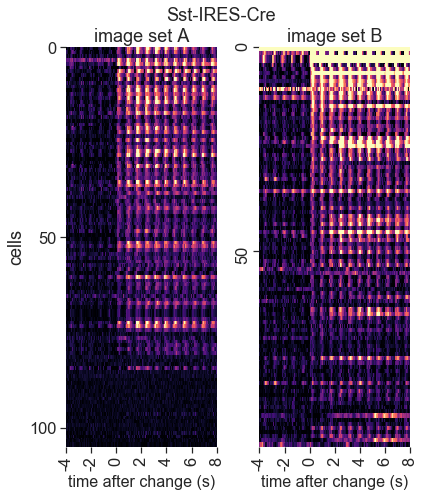

In [75]:
cre_line = 'Sst-IRES-Cre'

figsize=(6,7)
fig, ax = plt.subplots(1,2,figsize=figsize)
ax = ax.ravel()
for i,image_set in enumerate(['A','B']): 
    df = tdf[(tdf.cre_line==cre_line)&(tdf.image_set==image_set)]
    ax[i] = psf.plot_pref_stim_responses(df, vmax=0.3, ax=ax[i], window=[-4,8], colorbar=False, use_events=use_events, save_dir=None, folder='all_flashes')
    ax[i].set_title('image set '+image_set)
    ax[i].set_ylabel('')
ax[0].set_ylabel('cells')
fig.tight_layout() 

if save_dir:
    plt.suptitle(cre_line, x=0.52, y=0.98, fontsize=18, horizontalalignment='center')
    fig.tight_layout()
    plt.gcf().subplots_adjust(top=0.9)
    psf.save_figure(fig, figsize, save_dir, 'trials', 'pref_stim_response_heatmaps_'+cre_line)


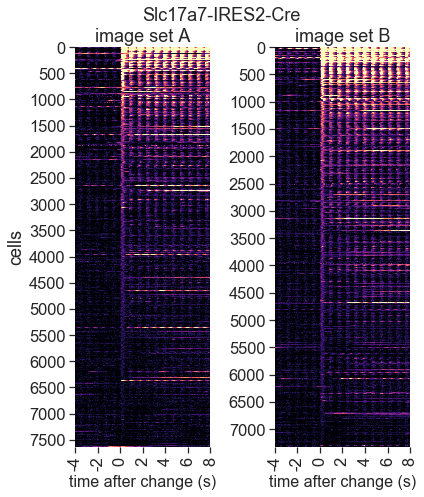

In [76]:
cre_line = 'Slc17a7-IRES2-Cre'

figsize=(6,7)
fig, ax = plt.subplots(1,2,figsize=figsize)
ax = ax.ravel()
for i,image_set in enumerate(['A','B']): 
    df = tdf[(tdf.cre_line==cre_line)&(tdf.image_set==image_set)]
    ax[i] = psf.plot_pref_stim_responses(df, vmax=0.3, ax=ax[i], window=[-4,8], colorbar=False, use_events=use_events, save_dir=None, folder='all_flashes')
    ax[i].set_title('image set '+image_set)
    ax[i].set_ylabel('')
ax[0].set_ylabel('cells')
fig.tight_layout()  

if save_dir:
    plt.suptitle(cre_line, x=0.52, y=0.98, fontsize=18, horizontalalignment='center')
    fig.tight_layout()
    plt.gcf().subplots_adjust(top=0.9)
    psf.save_figure(fig, figsize, save_dir, 'trials', 'pref_stim_response_heatmaps_'+cre_line)
